# High-level introduction to <code>pandas</code>
For a more complete introduction to <code>pandas</code>, see [https://pandas.pydata.org/](https://pandas.pydata.org/).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s = {'a1': 'gino', 'a2': 'mario'}

## Series
Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.).

In [3]:
data = np.random.randn(20)
index = range(1990, 2010)

In [4]:
print (data)
print (list(index))

[-0.70818163  1.02074795  0.43260053  1.08789236  0.2346386   0.64191936
 -1.27185804  0.30983802 -1.11694631  0.24611987  1.65683527  0.97618112
 -0.94271782 -0.93436902 -1.32239414  0.65634122 -0.24246406  0.79545786
  0.43152628 -0.70088774]
[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]


In [5]:
y = pd.Series(data, index=index)

In [6]:
print (y)

1990   -0.708182
1991    1.020748
1992    0.432601
1993    1.087892
1994    0.234639
1995    0.641919
1996   -1.271858
1997    0.309838
1998   -1.116946
1999    0.246120
2000    1.656835
2001    0.976181
2002   -0.942718
2003   -0.934369
2004   -1.322394
2005    0.656341
2006   -0.242464
2007    0.795458
2008    0.431526
2009   -0.700888
dtype: float64


In [7]:
y.loc[1992]

0.4326005272832375

In [8]:
salaries = {
    'gino': 1500, 'maria': 2560.34, 'luca': None, 'federico': 2451
}

In [9]:
s = pd.Series(salaries)

In [10]:
print (s)

gino        1500.00
maria       2560.34
luca            NaN
federico    2451.00
dtype: float64


### Access series as arrays

In [11]:
print (s[:2], '\n')
print (s[s > s.median()], '\n')
print (np.log(s), '\n')
print (s + s, '\n')
print (s * 3, '\n')

gino     1500.00
maria    2560.34
dtype: float64 

maria    2560.34
dtype: float64 

gino        7.313220
maria       7.847895
luca             NaN
federico    7.804251
dtype: float64 

gino        3000.00
maria       5120.68
luca            NaN
federico    4902.00
dtype: float64 

gino        4500.00
maria       7681.02
luca            NaN
federico    7353.00
dtype: float64 



In [12]:
print (y[4:8] + y[4:10])

1994    0.469277
1995    1.283839
1996   -2.543716
1997    0.619676
1998         NaN
1999         NaN
dtype: float64


### Access series as dictionaries

In [13]:
y[1990]

-0.7081816326573688

# Data Frames
From [http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe)

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

- Dict of 1D ndarrays, lists, dicts, or Series
- 2-D numpy.ndarray
- Structured or record ndarray
- A Series
- Another DataFrame

Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

If axis labels are not passed, they will be constructed from the input data based on common sense rules.

In [14]:
k = {'years': y, 'salaries': s}
df = pd.DataFrame(k)

In [15]:
print (df)

             years  salaries
1990     -0.708182       NaN
1991      1.020748       NaN
1992      0.432601       NaN
1993      1.087892       NaN
1994      0.234639       NaN
1995      0.641919       NaN
1996     -1.271858       NaN
1997      0.309838       NaN
1998     -1.116946       NaN
1999      0.246120       NaN
2000      1.656835       NaN
2001      0.976181       NaN
2002     -0.942718       NaN
2003     -0.934369       NaN
2004     -1.322394       NaN
2005      0.656341       NaN
2006     -0.242464       NaN
2007      0.795458       NaN
2008      0.431526       NaN
2009     -0.700888       NaN
federico       NaN   2451.00
gino           NaN   1500.00
luca           NaN       NaN
maria          NaN   2560.34


In [16]:
data = {}
for k, v in s.items():
    data[k] = {}
    for d, w in y.items():
        data[k][d] = v + (v*w)

In [17]:
ydf = pd.DataFrame(data)

In [18]:
print (ydf)

             gino        maria  luca     federico
1990   437.727551   747.154239   NaN   715.246818
1991  3031.121924  5173.801804   NaN  4952.853223
1992  2148.900791  3667.944434   NaN  3511.303892
1993  3131.838539  5345.714323   NaN  5117.424173
1994  1851.957896  3161.094586   NaN  3026.099202
1995  2462.879033  4203.871802   NaN  4024.344340
1996  -407.787067  -696.049025   NaN  -666.324067
1997  1964.757028  3353.630673   NaN  3210.412984
1998  -175.419468  -299.422321   NaN  -286.635411
1999  1869.179801  3190.490542   NaN  3054.239795
2000  3985.252908  6802.401621   NaN  6511.903252
2001  2964.271681  5059.695570   NaN  4843.619926
2002    85.923275   146.661865   NaN   140.398631
2003    98.446472   168.037627   NaN   160.861536
2004  -483.591212  -825.438615   NaN  -790.188040
2005  2484.511824  4240.796668   NaN  4059.692320
2006  1136.303910  1939.549569   NaN  1856.720590
2007  2693.186792  4596.982581   NaN  4400.667219
2008  2147.289413  3665.193983   NaN  3508.670900


In [19]:
ydf.head(n=2)

,gino,maria,luca,federico
1990,437.727551,747.154239,NaN,715.246818
1991,3031.121924,5173.801804,NaN,4952.853223


In [20]:
ydf.shape

(20, 4)

In [21]:
pd.DataFrame.from_dict(data, orient='index').head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
gino,437.727551,3031.121924,2148.900791,3131.838539,1851.957896,2462.879033,-407.787067,1964.757028,-175.419468,1869.179801,3985.252908,2964.271681,85.923275,98.446472,-483.591212,2484.511824,1136.303910,2693.186792,2147.289413,448.668387
maria,747.154239,5173.801804,3667.944434,5345.714323,3161.094586,4203.871802,-696.049025,3353.630673,-299.422321,3190.490542,6802.401621,5059.695570,146.661865,168.037627,-825.438615,4240.796668,1939.549569,4596.982581,3665.193983,765.829078
luca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
federico,715.246818,4952.853223,3511.303892,5117.424173,3026.099202,4024.344340,-666.324067,3210.412984,-286.635411,3054.239795,6511.903252,4843.619926,140.398631,160.861536,-790.188040,4059.692320,1856.720590,4400.667219,3508.670900,733.124144


## Loading and manipulating data
Retrieve the complete local dataset from <a href="https://www.kaggle.com/daveianhickey/2000-16-traffic-flow-england-scotland-wales">Kaggle website</a>.

In [23]:
accidents = '../data/trafficsample.csv'
A = pd.read_csv(accidents, low_memory=False, index_col=0)

In [24]:
A.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
175309,201243N075042,497930,188010,-0.588005,51.582399,43,3,2,1,04/04/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,2,Yes,E01017821,2012
53367,2.01E+12,621820,309050,1.276633,52.633805,36,3,2,1,23/12/2013,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1,Yes,E01026840,2013
85873,201305DD03109,352450,397563,-2.717854,53.472632,5,2,5,3,14/06/2013,...,No physical crossing within 50 meters,Daylight: Street light present,Raining with high winds,Wet/Damp,None,None,1,Yes,E01006852,2013
359233,201243N210022,479520,194780,-0.852115,51.646155,43,3,1,1,21/02/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,2,Yes,E01017916,2012
340672,201401GD11000,535170,185350,-0.051837,51.550802,1,3,2,1,09/12/2014,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,Pedestrian in carriageway (not injured),1,Yes,E01001734,2014


In [25]:
A.dtypes

Accident_Index                                  object
Location_Easting_OSGR                            int64
Location_Northing_OSGR                           int64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
Junction_D

In [26]:
A[['Date', 'Time']].head()

,Date,Time
175309,04/04/2012,20:49
53367,23/12/2013,12:40
85873,14/06/2013,16:48
359233,21/02/2012,07:39
340672,09/12/2014,14:30


In [27]:
from datetime import datetime

def todate(d, t):
    try:
        dt = datetime.strptime(" ".join([d, t]), '%d/%m/%Y %H:%M')
    except TypeError:
        dt = np.nan
    return dt

In [28]:
A['Datetime'] = [todate(x.Date, x.Time) for i, x in A.iterrows()]

In [29]:
A.shape

(10000, 34)

In [30]:
A.dtypes

Accident_Index                                         object
Location_Easting_OSGR                                   int64
Location_Northing_OSGR                                  int64
Longitude                                             float64
Latitude                                              float64
Police_Force                                            int64
Accident_Severity                                       int64
Number_of_Vehicles                                      int64
Number_of_Casualties                                    int64
Date                                                   object
Day_of_Week                                             int64
Time                                                   object
Local_Authority_(District)                              int64
Local_Authority_(Highway)                              object
1st_Road_Class                                          int64
1st_Road_Number                                         int64
Road_Typ

## Access dataframe by index and col

In [31]:
A.iloc[2:6] # gets rows (or columns) at particular positions in the index (so it only takes integers).

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Datetime
85873,201305DD03109,352450,397563,-2.717854,53.472632,5,2,5,3,14/06/2013,...,Daylight: Street light present,Raining with high winds,Wet/Damp,None,None,1,Yes,E01006852,2013,2013-06-14 16:48:00
359233,201243N210022,479520,194780,-0.852115,51.646155,43,3,1,1,21/02/2012,...,Daylight: Street light present,Fine without high winds,Dry,None,None,2,Yes,E01017916,2012,2012-02-21 07:39:00
340672,201401GD11000,535170,185350,-0.051837,51.550802,1,3,2,1,09/12/2014,...,Daylight: Street light present,Fine without high winds,Dry,None,Pedestrian in carriageway (not injured),1,Yes,E01001734,2014,2014-12-09 14:30:00
369203,201342I202807,550055,223249,0.179006,51.887560,42,3,3,2,15/07/2013,...,Daylight: Street light present,Fine without high winds,Dry,None,None,2,Yes,E01022087,2013,2013-07-15 11:20:00


In [32]:
A.loc[[85873, 340672]] # gets rows (or columns) with particular labels from the index

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Datetime
85873,201305DD03109,352450,397563,-2.717854,53.472632,5,2,5,3,14/06/2013,...,Daylight: Street light present,Raining with high winds,Wet/Damp,None,None,1,Yes,E01006852,2013,2013-06-14 16:48:00
340672,201401GD11000,535170,185350,-0.051837,51.550802,1,3,2,1,09/12/2014,...,Daylight: Street light present,Fine without high winds,Dry,None,Pedestrian in carriageway (not injured),1,Yes,E01001734,2014,2014-12-09 14:30:00


In [33]:
selection = A[A['Road_Surface_Conditions'] == 'Dry'].sort_values(
    'Number_of_Casualties', ascending=False)

In [34]:
selection[['Road_Surface_Conditions', 'Number_of_Casualties']].head()

,Road_Surface_Conditions,Number_of_Casualties
342377,Dry,21
21228,Dry,10
47734,Dry,10
387706,Dry,9
301798,Dry,9


In [35]:
selection[['Weather_Conditions', 'Accident_Severity', 
           'Number_of_Vehicles', 'Number_of_Casualties']].head()

,Weather_Conditions,Accident_Severity,Number_of_Vehicles,Number_of_Casualties
342377,Fine without high winds,3,2,21
21228,Fine without high winds,3,2,10
47734,Fine without high winds,2,1,10
387706,Fine without high winds,3,5,9
301798,Unknown,3,2,9


In [36]:
selection.shape

(6821, 34)

In [37]:
selection[['Weather_Conditions', 'Accident_Severity', 
           'Number_of_Vehicles', 'Number_of_Casualties']].groupby(
    'Weather_Conditions').mean()

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties
Weather_Conditions,,,
Fine with high winds,2.780000,1.720000,1.300000
Fine without high winds,2.832725,1.844444,1.328767
Fog or mist,2.818182,1.636364,1.090909
Other,2.800000,1.900000,1.233333
Raining with high winds,2.500000,2.000000,1.000000
Raining without high winds,2.700000,1.900000,1.200000
Unknown,2.883562,1.787671,1.267123


In [38]:
sel = selection[['Weather_Conditions', 'Accident_Severity', 
           'Number_of_Vehicles', 'Number_of_Casualties', 'Datetime']]

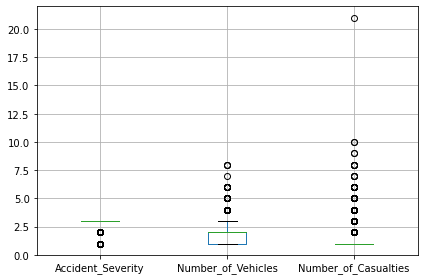

In [39]:
sel.boxplot()
plt.tight_layout()
plt.show()

In [40]:
minutes = []
for i, row in sel.iterrows():
    h, m = row['Datetime'].hour, row['Datetime'].minute
    minutes.append(h*60 + m)
sel = sel.copy()
sel['Minutes'] = minutes

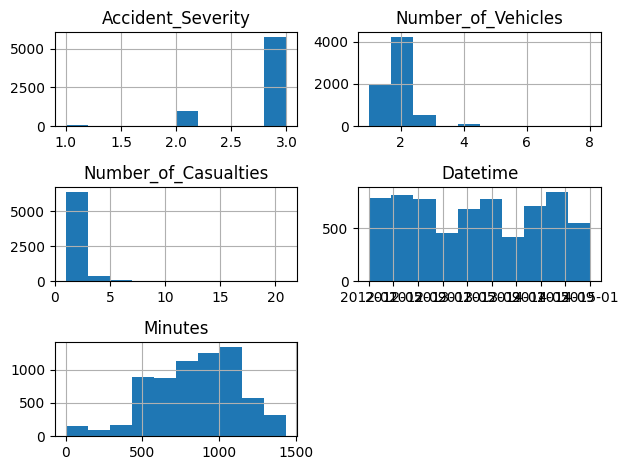

In [41]:
sel.hist()
plt.tight_layout()
plt.show()

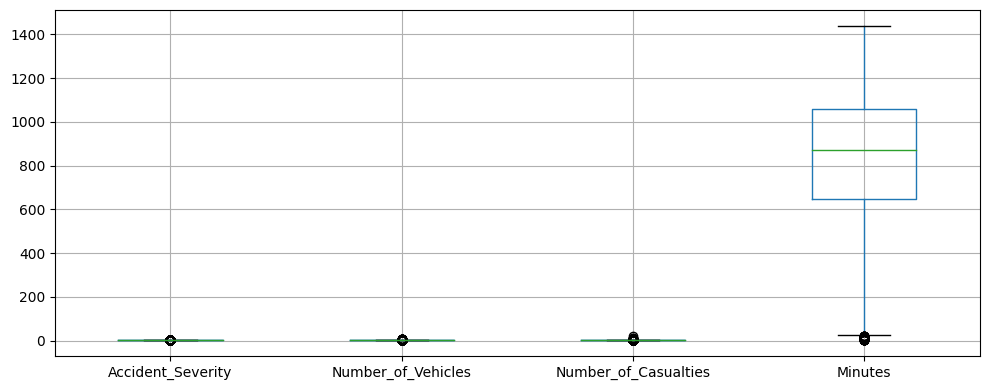

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), sharey=True)
sel.boxplot(ax=axes)
plt.tight_layout()
plt.show()

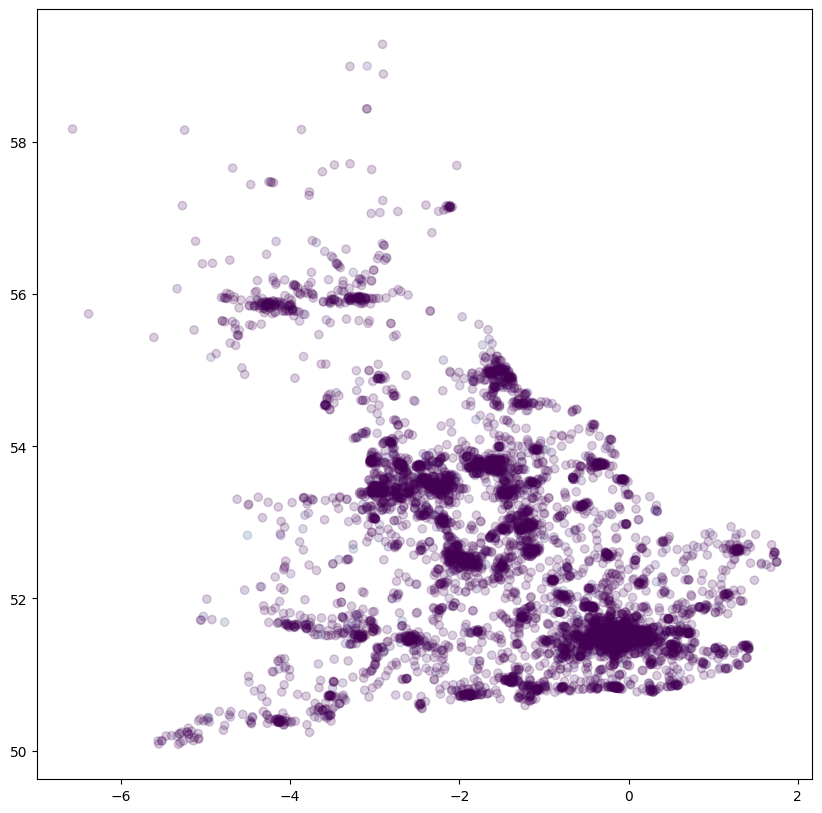

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), sharey=True)
axes.scatter(selection.Longitude.values, selection.Latitude.values, 
             c=selection.Number_of_Casualties, alpha=0.2)
plt.show()

In [44]:
import geopandas as gpd

In [50]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [51]:
UK = world[world['iso_a3']=='GBR']

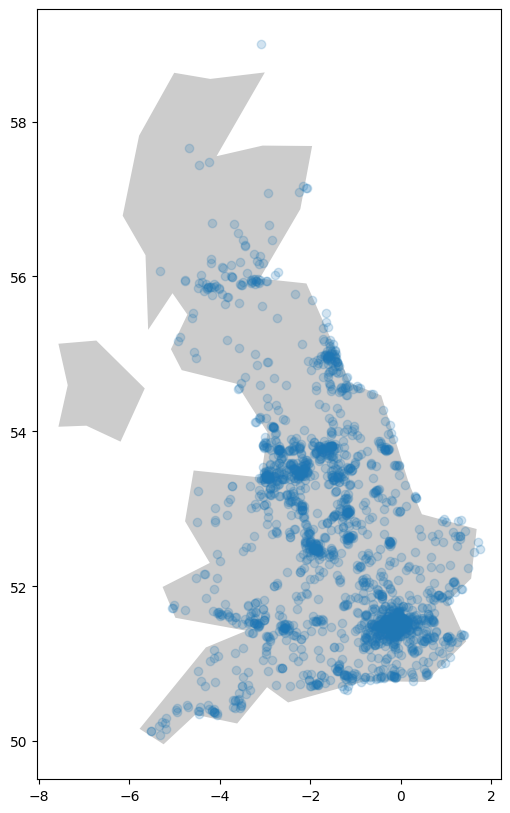

In [52]:
limit = 2000
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), sharey=True)
UK.plot(ax=axes, color='#CCCCCC')
axes.scatter(selection.Longitude.values[:limit], selection.Latitude.values[:limit], alpha=0.2)
plt.show()